In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [16]:
data = pd.read_csv('data/Arizona19NO2.csv')
data = data.drop(data.columns[0], axis=1)
print(data.head())
print('\n Data Types:')
print(data.dtypes)

   Date Local   NO2 Mean
0  2000-01-01  15.208333
1  2000-01-02  18.500000
2  2000-01-04  31.521739
3  2000-01-05  28.541667
4  2000-01-06  27.250000

 Data Types:
Date Local     object
NO2 Mean      float64
dtype: object


In [18]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/Arizona19NO2.csv', header=0, parse_dates=['Date Local'], index_col='Date Local', date_parser=dateparse)
data = data.drop(data.columns[0], axis=1)
print(data.head())

             NO2 Mean
Date Local           
2000-01-01  15.208333
2000-01-02  18.500000
2000-01-04  31.521739
2000-01-05  28.541667
2000-01-06  27.250000


In [19]:
data.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09',
               '2000-01-10', '2000-01-11',
               ...
               '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-25',
               '2016-03-26', '2016-03-27', '2016-03-28', '2016-03-29',
               '2016-03-30', '2016-03-31'],
              dtype='datetime64[ns]', name='Date Local', length=5723, freq=None)

In [20]:
ts = data['NO2 Mean']
ts.head(10)

Date Local
2000-01-01    15.208333
2000-01-02    18.500000
2000-01-04    31.521739
2000-01-05    28.541667
2000-01-06    27.250000
2000-01-07    29.666667
2000-01-08    30.125000
2000-01-09    29.625000
2000-01-10    32.750000
2000-01-11    31.416667
Name: NO2 Mean, dtype: float64

In [24]:
ts['2000-01-01']

15.208332999999998

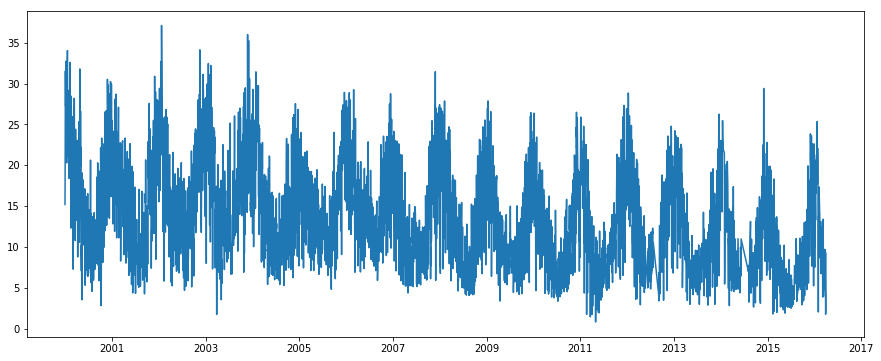

In [25]:
plt.plot(ts)

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


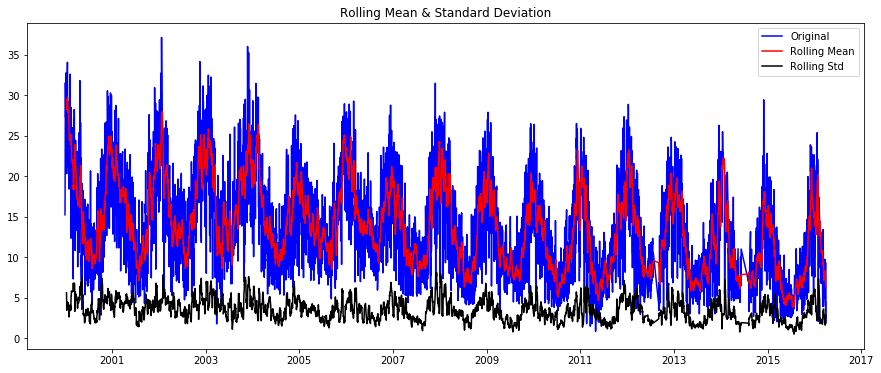

Results of Dickey-Fuller Test:
Test Statistic                   -5.129862
p-value                           0.000012
#Lags Used                       20.000000
Number of Observations Used    5702.000000
Critical Value (1%)              -3.431497
Critical Value (5%)              -2.862047
Critical Value (10%)             -2.567040
dtype: float64


In [29]:
test_stationarity(ts)

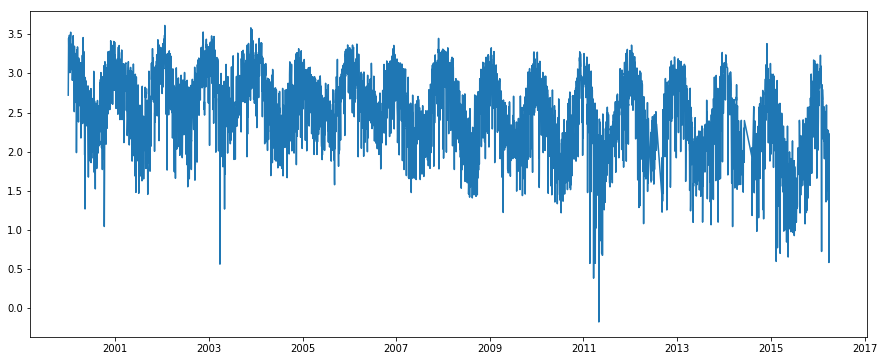

In [30]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


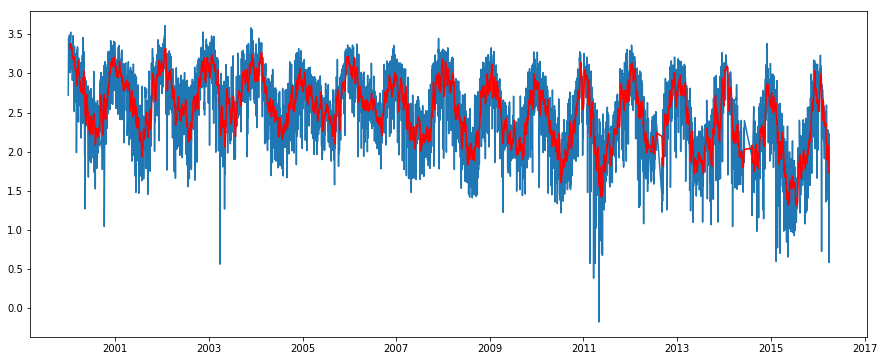

In [31]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [32]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date Local
2000-01-01         NaN
2000-01-02         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08         NaN
2000-01-09         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13    0.151994
Name: NO2 Mean, dtype: float64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


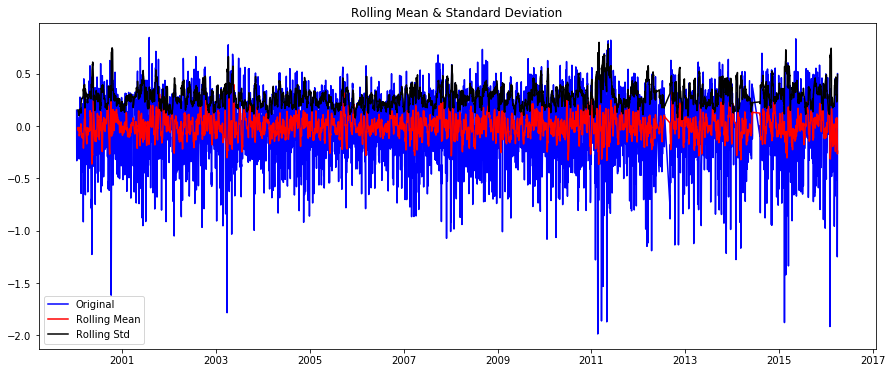

Results of Dickey-Fuller Test:
Test Statistic                -1.470411e+01
p-value                        2.915574e-27
#Lags Used                     3.300000e+01
Number of Observations Used    5.678000e+03
Critical Value (1%)           -3.431502e+00
Critical Value (5%)           -2.862049e+00
Critical Value (10%)          -2.567041e+00
dtype: float64


In [33]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


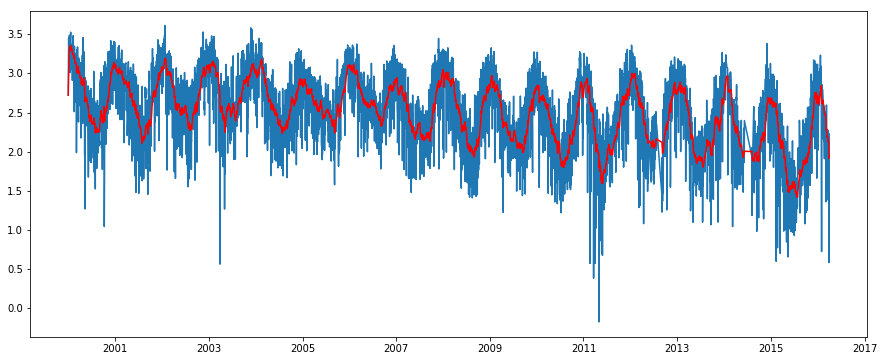

In [34]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


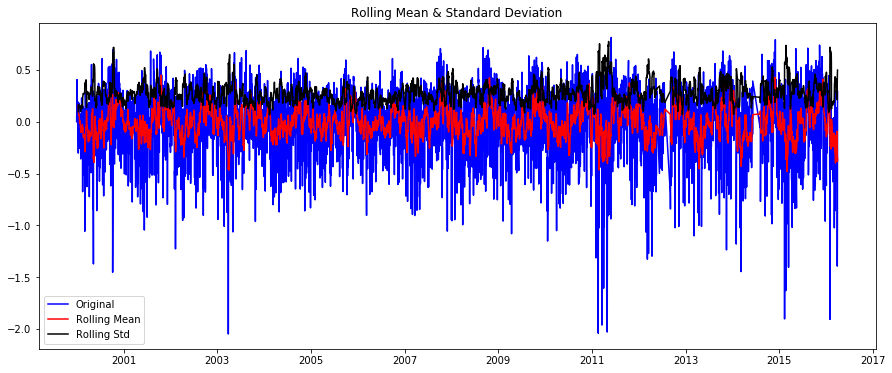

Results of Dickey-Fuller Test:
Test Statistic                -8.741337e+00
p-value                        3.003174e-14
#Lags Used                     3.400000e+01
Number of Observations Used    5.688000e+03
Critical Value (1%)           -3.431500e+00
Critical Value (5%)           -2.862048e+00
Critical Value (10%)          -2.567041e+00
dtype: float64


In [35]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

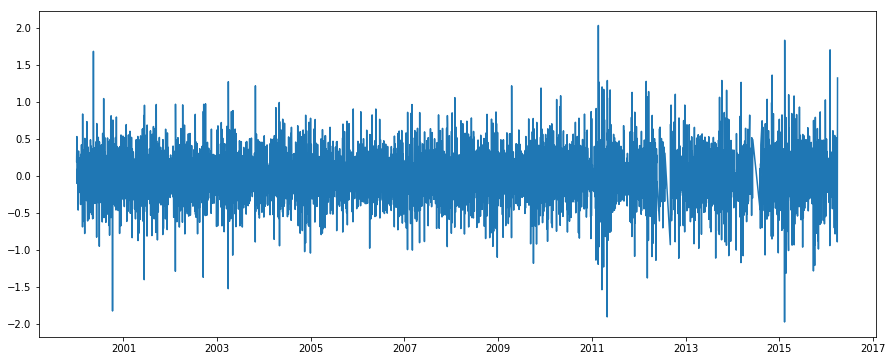

In [36]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


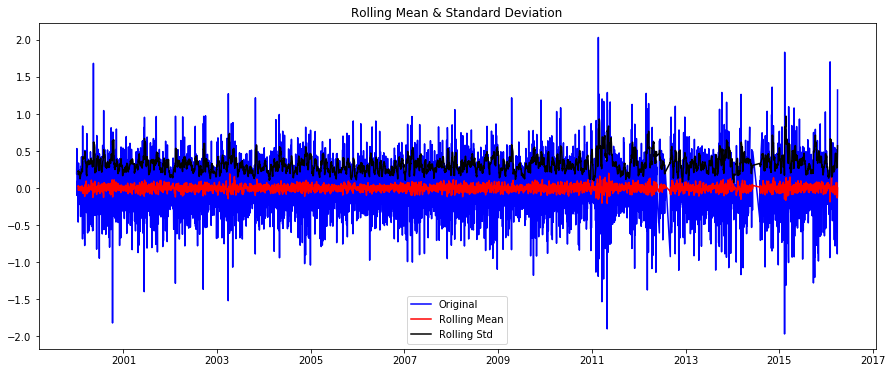

Results of Dickey-Fuller Test:
Test Statistic                -1.716967e+01
p-value                        6.756469e-30
#Lags Used                     3.200000e+01
Number of Observations Used    5.689000e+03
Critical Value (1%)           -3.431500e+00
Critical Value (5%)           -2.862048e+00
Critical Value (10%)          -2.567041e+00
dtype: float64


In [37]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

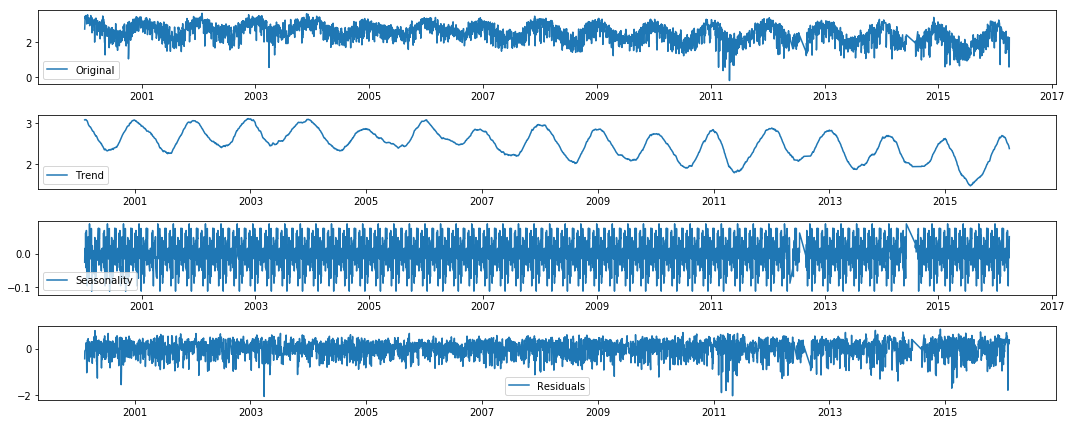

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=100)       # Check the value of freq

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


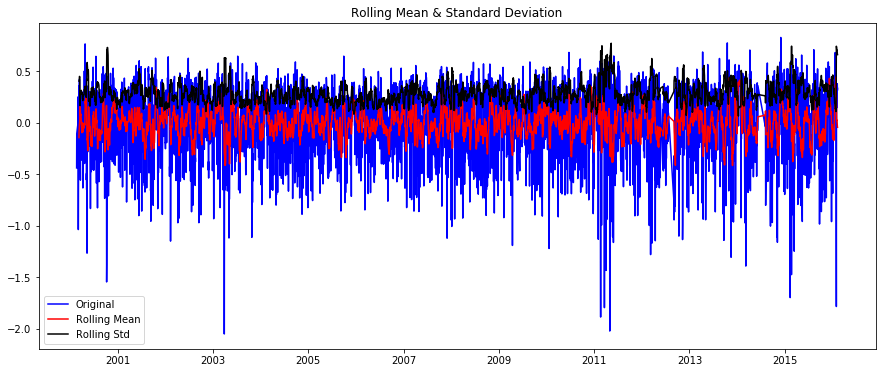

Results of Dickey-Fuller Test:
Test Statistic                -1.465763e+01
p-value                        3.421246e-27
#Lags Used                     3.200000e+01
Number of Observations Used    5.590000e+03
Critical Value (1%)           -3.431520e+00
Critical Value (5%)           -2.862057e+00
Critical Value (10%)          -2.567045e+00
dtype: float64


In [43]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

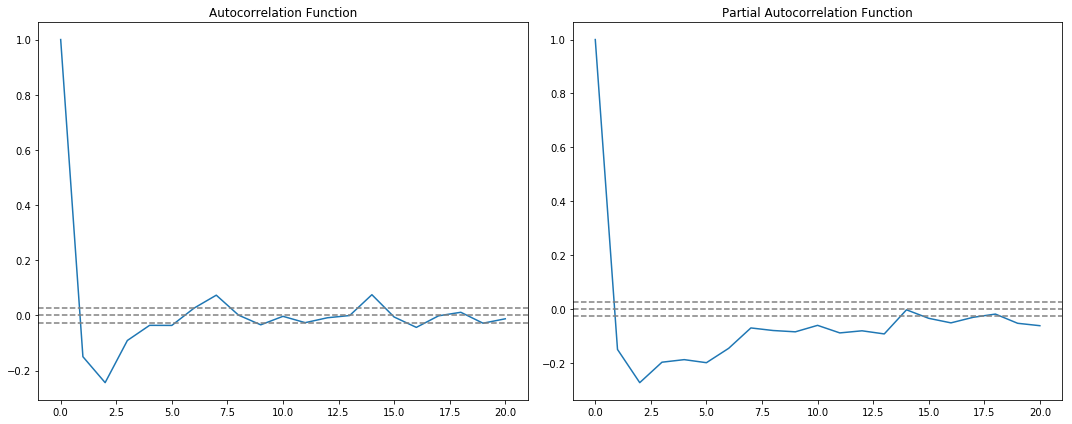

In [44]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

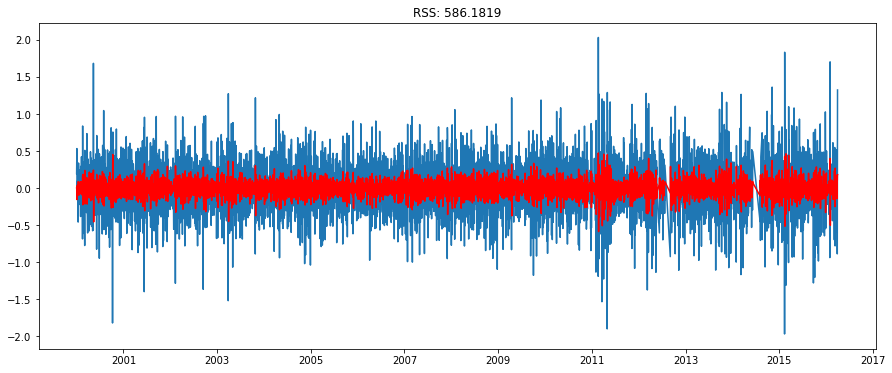

In [45]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2)) 


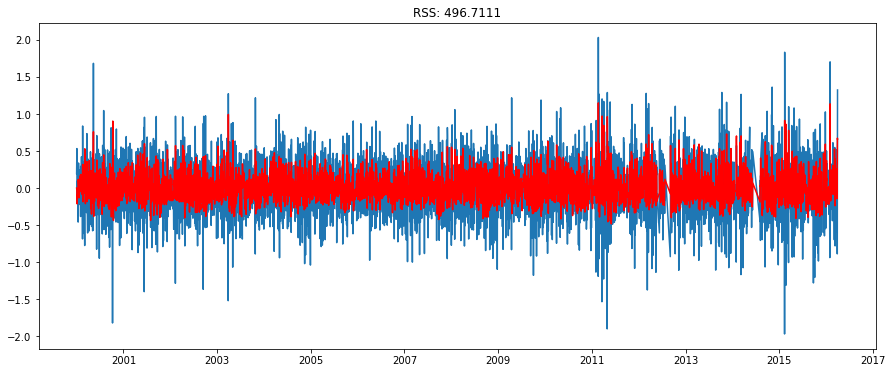

In [46]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

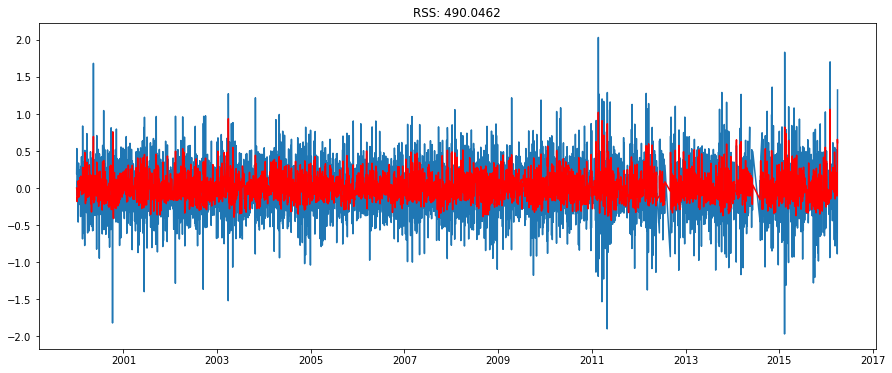

In [47]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date Local
2000-01-02   -0.000250
2000-01-04   -0.029836
2000-01-05   -0.152426
2000-01-06   -0.182318
2000-01-07   -0.136161
dtype: float64


In [51]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date Local
2000-01-02   -0.000250
2000-01-04   -0.030086
2000-01-05   -0.182512
2000-01-06   -0.364830
2000-01-07   -0.500991
dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date Local
2000-01-01    2.721844
2000-01-02    2.721594
2000-01-04    2.691758
2000-01-05    2.539331
2000-01-06    2.357013
dtype: float64

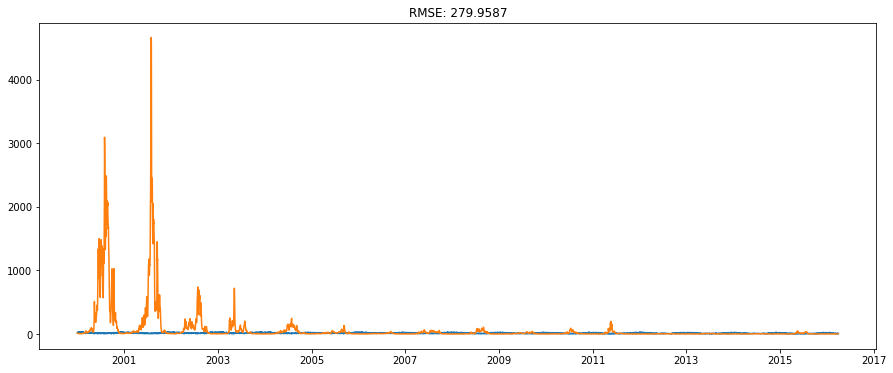

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))